In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

print("Current Path: ", os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/VNE_Input-main')
print("Current Path: ", os.getcwd())

Current Path:  /content
Current Path:  /content/drive/MyDrive/Colab Notebooks/VNE_Input-main


In [ ]:
import sys
import copy
import graph
import pickle
import networkx as nx
from vne import create_vne
import matplotlib.pyplot as plt

In [ ]:
# !unzip alib

In [ ]:
!pip install gurobipy
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 15.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 14.1 MB/s 


In [ ]:
# Graph Extraction
class Extract:
    def get_graphs(self):
        # os.chdir('/content/drive/MyDrive/Colab Notebooks/VCC_project/VNE_Input-main/')
        current = os.getcwd()
        print(current)
        current = os.path.join(
            os.path.dirname(current),
            "VNE_Input-main",
            "P3_ALIB_MASTER",
            "input",
            "senario_RedBestel.pickle",
        )
        with open(current, "rb") as f:
            data = pickle.load(f)
        para = graph.Parameters(10000, 500000, 10000, 500000, 0, 100, 0, 100, 1,
                                1) 
        substrate = graph.Graph(
            len(data.scenario_list[0].substrate.nodes),
            data.scenario_list[0].substrate.edges,
            para,
        )
        min_nodes=4
        max_nodes=6
        no_requests=25
        vne_list = create_vne(min_nodes, max_nodes, no_requests)
        return substrate, vne_list


In [ ]:
x = Extract()
# substrate, vne_list = x.get_graphs(req_no = 15)    # USE THIS STATEMENT FOR AUTOMATION & comment line no 42
substrate, vne_list = x.get_graphs()
output = {"substrate": substrate, "vne_list": vne_list}
pickle_file = open("input.pickle", "wb")
pickle.dump(output, pickle_file)

/content/drive/MyDrive/Colab Notebooks/VNE_Input-main


In [ ]:
print("Substrate Network")
print("Nodes: ", substrate.nodes)
print("Nodes & their Weights: ", substrate.node_weights)
print("Edges: ", len(substrate.edges))
print("Edge & their Weights: ", substrate.edge_weights)
print("Adj List: ", substrate.neighbours)

Substrate Network
Nodes:  84
Nodes & their Weights:  {0: 299689, 1: 326329, 2: 15904, 3: 136150, 4: 202346, 5: 158739, 6: 479465, 7: 61224, 8: 383265, 9: 39503, 10: 151269, 11: 171885, 12: 326372, 13: 221068, 14: 287633, 15: 120601, 16: 420010, 17: 20357, 18: 279756, 19: 479550, 20: 498509, 21: 322468, 22: 458840, 23: 465364, 24: 35273, 25: 166009, 26: 194713, 27: 399573, 28: 50898, 29: 440913, 30: 112281, 31: 434460, 32: 54680, 33: 225830, 34: 392179, 35: 31459, 36: 300371, 37: 420190, 38: 40701, 39: 387807, 40: 57631, 41: 81664, 42: 131368, 43: 459222, 44: 297065, 45: 45114, 46: 280579, 47: 43591, 48: 20315, 49: 461208, 50: 361637, 51: 328091, 52: 264736, 53: 122778, 54: 222221, 55: 457702, 56: 294614, 57: 18703, 58: 232816, 59: 114056, 60: 174563, 61: 274914, 62: 158416, 63: 136062, 64: 452346, 65: 173914, 66: 103814, 67: 471467, 68: 245055, 69: 112530, 70: 42960, 71: 359271, 72: 45823, 73: 116867, 74: 186077, 75: 474988, 76: 223066, 77: 268142, 78: 396741, 79: 12100, 80: 411293, 81

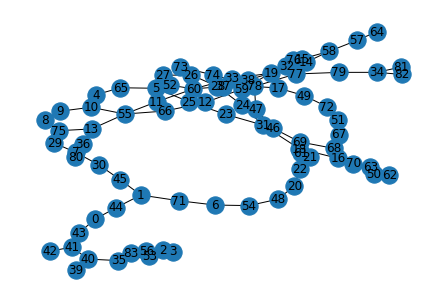

In [ ]:
G_sub = nx.Graph()

for u,v in substrate.edges:
  G_sub.add_edge(u, v)

nx.draw(G_sub, with_labels = True)
# plt.savefig("substrate.png")

In [ ]:
# Demo_Substrate Graph
nodes = 8
para = graph.Parameters(100, 150, 140, 150, 0, 100, 0, 100, 1, 1)
# edges = [('0', '1'), ('1', '0'), ('0', '4'), ('4', '0'), ('1', '2'), ('2', '1'),
        #  ('4', '1'), ('1', '4'), ('2', '3'), ('3', '2'), ('3', '4'), ('4', '3')]
edges = []
for i in range(nodes):
  for j in range(nodes):
    if i != j:
      edges.append((str(i), str(j)))
demo_substrate = graph.Graph(nodes, edges, para)

In [ ]:
print("demo_substrate Network")
# print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
# print("Edges: ", demo_substrate.edges)
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

demo_substrate Network
Nodes & their Weights:  {0: 148, 1: 140, 2: 140, 3: 143, 4: 144, 5: 148, 6: 144, 7: 141}
Edge & their Weights:  {('0', '1'): 133, ('1', '0'): 133, ('0', '2'): 141, ('2', '0'): 141, ('0', '3'): 146, ('3', '0'): 146, ('0', '4'): 101, ('4', '0'): 101, ('0', '5'): 131, ('5', '0'): 131, ('0', '6'): 148, ('6', '0'): 148, ('0', '7'): 128, ('7', '0'): 128, ('1', '2'): 124, ('2', '1'): 124, ('1', '3'): 129, ('3', '1'): 129, ('1', '4'): 149, ('4', '1'): 149, ('1', '5'): 126, ('5', '1'): 126, ('1', '6'): 125, ('6', '1'): 125, ('1', '7'): 127, ('7', '1'): 127, ('2', '3'): 123, ('3', '2'): 123, ('2', '4'): 104, ('4', '2'): 104, ('2', '5'): 106, ('5', '2'): 106, ('2', '6'): 127, ('6', '2'): 127, ('2', '7'): 120, ('7', '2'): 120, ('3', '4'): 108, ('4', '3'): 108, ('3', '5'): 112, ('5', '3'): 112, ('3', '6'): 142, ('6', '3'): 142, ('3', '7'): 111, ('7', '3'): 111, ('4', '5'): 143, ('5', '4'): 143, ('4', '6'): 117, ('6', '4'): 117, ('4', '7'): 104, ('7', '4'): 104, ('5', '6'): 12

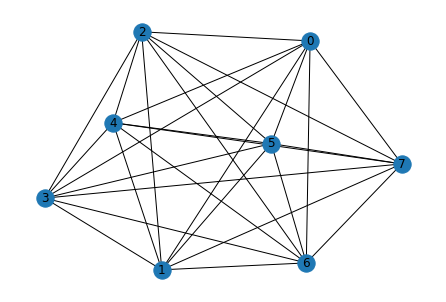

In [ ]:
G_demo_sub = nx.Graph()

for u,v in demo_substrate.edges:
  G_demo_sub.add_edge(u, v)

nx.draw(G_demo_sub, with_labels = True)
plt.savefig("demo_substrate.png")

In [ ]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  print("Request ", i+1)
  print("--------------------------------------------------------------")
  print("VNE Request")
  # print("Nodes: ", vne.nodes)
  print("Nodes & their Weights: ", vne.node_weights)
  # print("Edges: ", vne.edges)
  print("Edge & their Weights: ", vne.edge_weights)
  print("Adj List: ", vne.neighbours)
  print()
  

Request  1
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 9, 1: 7, 2: 7, 3: 9, 4: 12, 5: 13}
Edge & their Weights:  {('3', '5'): 3, ('5', '3'): 3, ('2', '5'): 9, ('5', '2'): 9, ('5', '4'): 2, ('4', '5'): 2, ('1', '3'): 4, ('3', '1'): 4, ('1', '4'): 10, ('4', '1'): 10, ('4', '2'): 4, ('2', '4'): 4, ('0', '4'): 6, ('4', '0'): 6, ('2', '1'): 9, ('1', '2'): 9}
Adj List:  {0: {'4'}, 1: {'3', '2', '4'}, 2: {'5', '4', '1'}, 3: {'5', '1'}, 4: {'5', '0', '2', '1'}, 5: {'2', '3', '4'}}

Request  2
--------------------------------------------------------------
VNE Request
Nodes & their Weights:  {0: 13, 1: 11, 2: 8, 3: 14, 4: 11, 5: 12}
Edge & their Weights:  {('2', '5'): 1, ('5', '2'): 1, ('1', '3'): 4, ('3', '1'): 4, ('1', '4'): 5, ('4', '1'): 5, ('3', '2'): 2, ('2', '3'): 2, ('0', '1'): 5, ('1', '0'): 5}
Adj List:  {0: {'1'}, 1: {'3', '4', '0'}, 2: {'3', '5'}, 3: {'2', '1'}, 4: {'1'}, 5: {'2'}}

Request  3
--------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


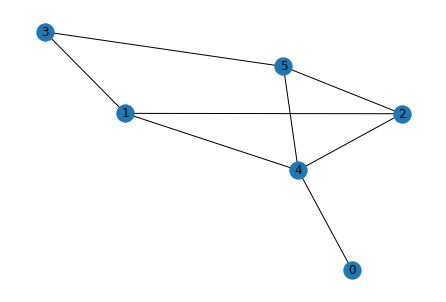

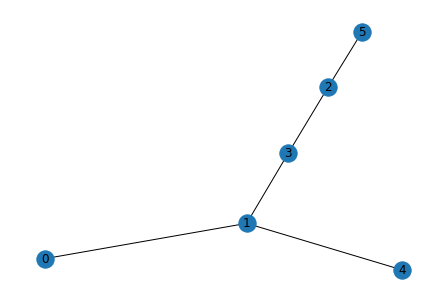

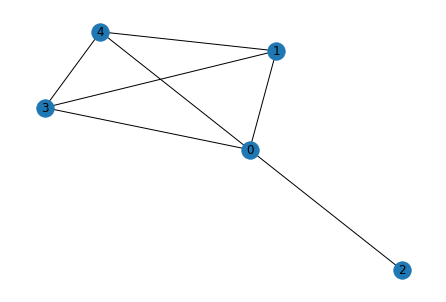

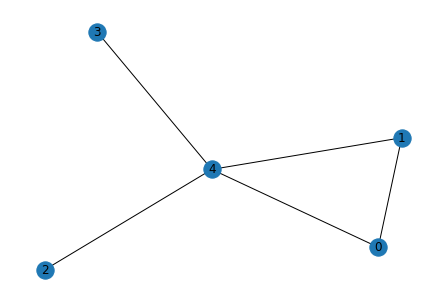

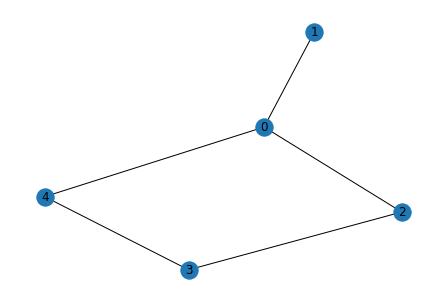

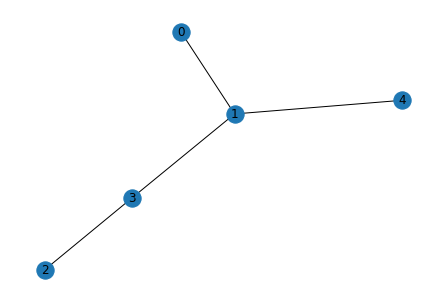

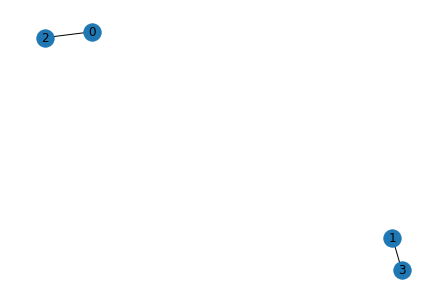

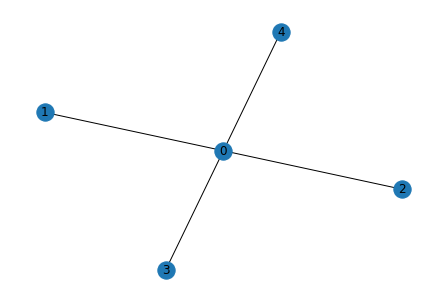

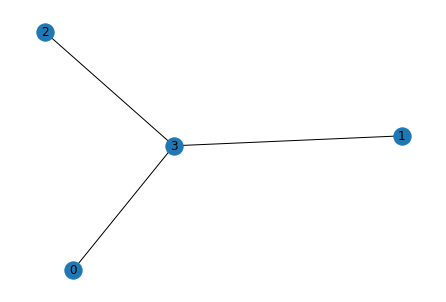

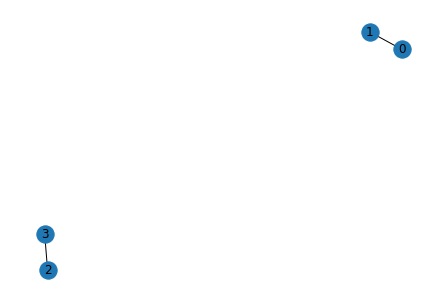

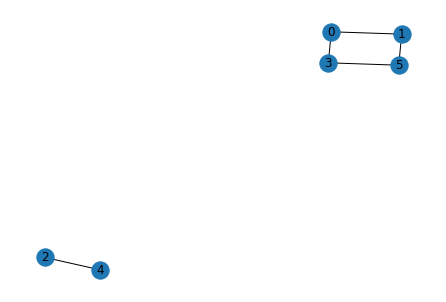

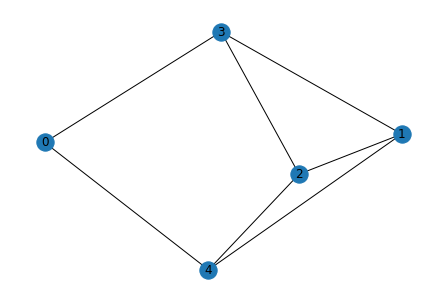

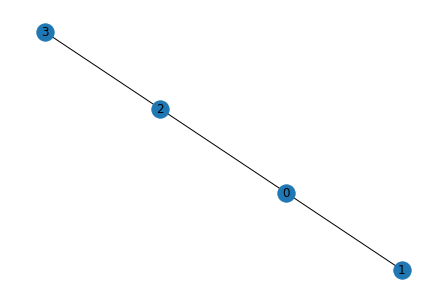

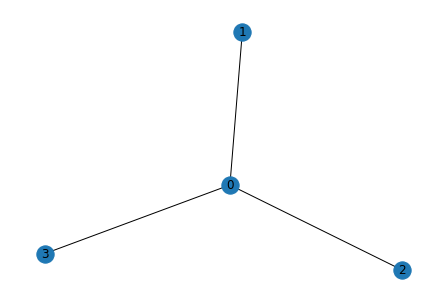

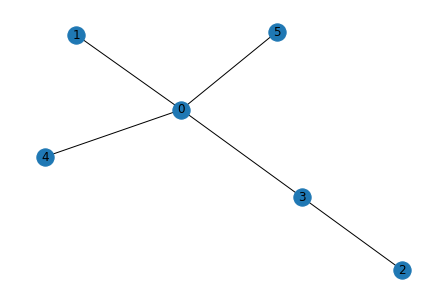

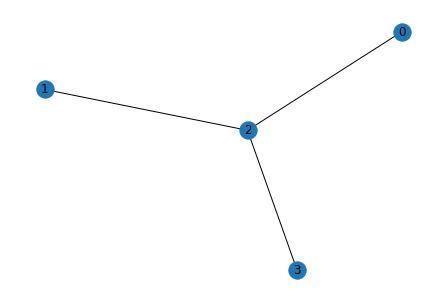

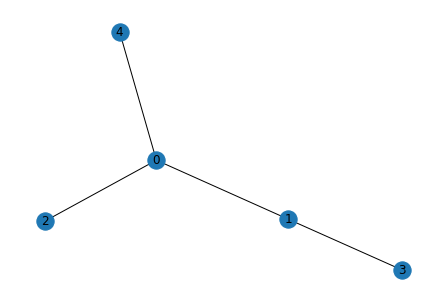

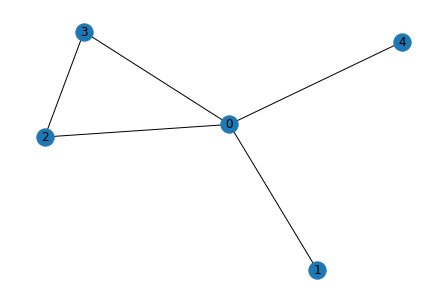

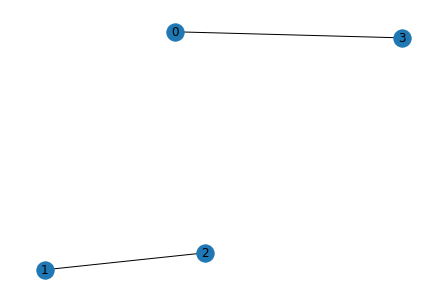

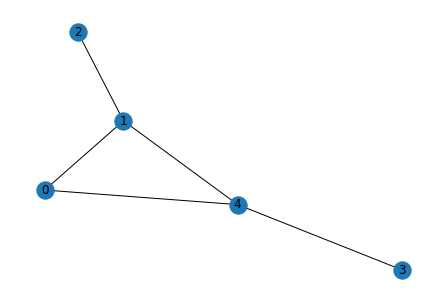

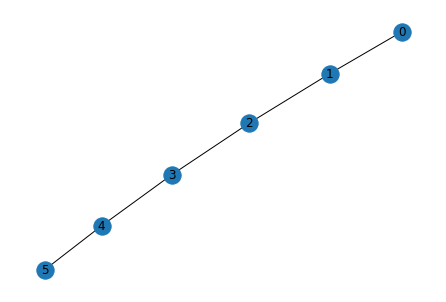

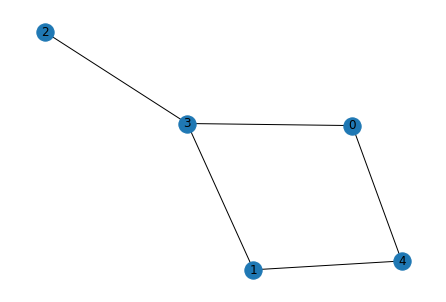

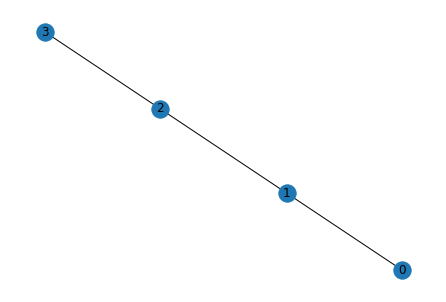

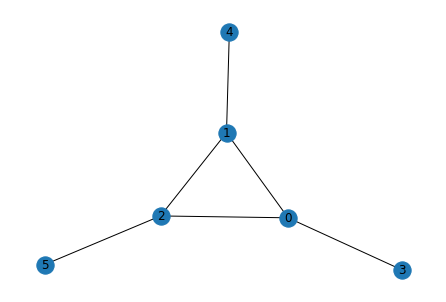

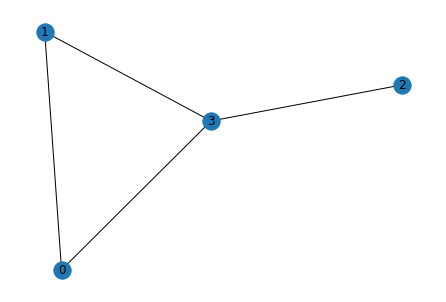

In [ ]:
for i in range(len(vne_list)):
  vne = vne_list[i]
  G_vne = nx.Graph()

  for u,v in vne.edges:
    G_vne.add_edge(u, v)
  plt.figure(i+1)
  nx.draw(G_vne, with_labels = True)
  plt.savefig("vne_"+str(i+1)+".png")
  # plt.clf()

In [ ]:
def strength(graph, node):
  sum = 0
  for v in graph.neighbours[node]:
    sum += graph.edge_weights[(str(node), v)]
  return sum

def dgr(graph, node):
  return len(graph.neighbours[node])

In [ ]:
def getNoderank(graph):
  dict_graph = {}
  for node, weight in graph.node_weights.items():
    p1 = weight * strength(graph, node) * dgr(graph, node)
    dict_graph[node] = p1
  return dict_graph

In [ ]:
# Calculate the sum of all nodes weight of graph
def nodes_sum(graph):
  total_sum = 0
  for node,weight in graph.node_weights.items():
    total_sum += weight
  return total_sum


# Calculate the sum of all edges weight of graph
def edges_sum(graph):
  total_sum = 0
  for edge,weight in graph.edge_weights.items():
    total_sum += weight
  total_sum /= 2
  return total_sum

In [ ]:
# Calculate Revenue of the graph
def getRevenue(graph, w_a = 1, w_b = 1):
  nodes_weight_sum = nodes_sum(graph)
  edges_weight_sum = edges_sum(graph)
  revenue = w_a*nodes_weight_sum + w_b*edges_weight_sum
  return revenue

# print(getRevenue(vne_list[0]))

In [ ]:
VNEmbed_nodes = [-1]*len(vne_list)
VNEmbed_edges = [-1]*len(vne_list)
VNE_parameters = [[]]*len(vne_list)
VNE_avgPath_len = [0]*len(vne_list)

# store node and weight sum(node_sum, edge_sum) after each mapping and if any vne unable to mapped then store (-1, -1)
substrate_details = [-1]*(len(vne_list)+1)

nodeSum_temp = nodes_sum(demo_substrate)
edgeSum_temp = edges_sum(demo_substrate)
substrate_details[0] = (nodeSum_temp, edgeSum_temp)
print("Inital state of physical graph\n" + " Node sum: " + str(nodeSum_temp).rjust(10)
 + " Edge sum: " + str(edgeSum_temp).rjust(10))

#Modified Best fit 
temp_curr_state_sg = copy.deepcopy(demo_substrate)
temp_curr_state_sg_ff = copy.deepcopy(demo_substrate)
curr_state_sg = copy.deepcopy(temp_curr_state_sg)

revenue_vne_ = {}
accepted_req = 0
acceptanceRation = []
for ix in range(len(vne_list)):
  vne = vne_list[ix]
  revenue_vn = getRevenue(vne)
  revenue_vne_[ix+1] = revenue_vn 

print(revenue_vne_)
print( sorted(revenue_vne_.items(), key = lambda kv:(kv[1]), reverse=True))
print("-----------------------------------------------------------------------\n\n")
temp_ix = 1
accepted_req = 0

# for i in range(len(vne_list)):
for i,r in sorted(revenue_vne_.items(), key = lambda kv:(kv[1]), reverse=True):
  vne = vne_list[i-1]

  mappingVtoS = {}
  mappingStoV = {}
  # curr_state_sg = demo_substrate
  temp_ix += 1
  vne = vne_list[i-1]
  temp_list = [-1, -1, -1]
  revenue_vne = r
  print("Revenue: ", revenue_vne, " node weights sum = ", nodes_sum(vne),  " edge weights sum = ", edges_sum(vne))
  sn_cost_node = 0
  sn_cost_edge = 0

  all_link_path_len_cur_vne = []
  # Node Mapping

  flag = False

  v_node_itr = getNoderank(vne)
  s_node_itr = getNoderank(demo_substrate)

  for nd_id, v_r in sorted(v_node_itr.items(), key = lambda kv:(kv[1]), reverse=True):
    nd_cap = vne.node_weights[nd_id]

    for s_nd_from_tri,r in sorted(s_node_itr.items(), key = lambda kv:(kv[1]), reverse=True):
      s_nd_cap = curr_state_sg.node_weights[s_nd_from_tri]

      if nd_cap <= s_nd_cap and mappingStoV.get(str(s_nd_from_tri)) == None:
        mappingVtoS[str(nd_id)] = str(s_nd_from_tri)
        mappingStoV[str(s_nd_from_tri)] = str(nd_id)
        curr_state_sg.node_weights[s_nd_from_tri] -= nd_cap
        sn_cost_node += nd_cap
        break 
  
    if mappingVtoS.get(str(nd_id)) == None:
      flag = True
      curr_state_sg = copy.deepcopy(temp_curr_state_sg)
      print("Unable to embed all nodes for VNRequest_", i, " VNRequest Discarded")
      VNE_parameters[i-1] = [revenue_vne, -1, -1]
      # curr_state_sg = temp_curr_state_sg
      break
  if flag:
    continue
  
  if len(mappingVtoS) == vne.nodes:
    print("Node Mapping for VNRequest_", i, " is completed, Waiting for Link Mapping")
    # print(mappingVtoS)
    # print(mappingStoV)
  else:
    print("Unable to embed all nodes for VNRequest_", i, " VNRequest Discarded")
    VNE_parameters[i-1] = [revenue_vne, -1, -1]
    curr_state_sg = copy.deepcopy(temp_curr_state_sg)
    continue

  print(mappingVtoS)


  # Link Mapping

  link_map_VtoS = {}
  for u,v in vne.edges:
    mapped_s_nd_u = mappingVtoS[u]
    mapped_s_nd_v = mappingVtoS[v]
    demand_uv = vne.edge_weights[(u, v)]
    
    all_path_uv = curr_state_sg.printAllPaths(mapped_s_nd_u, mapped_s_nd_v, demand_uv)
    all_path_uv.sort(key = len)
    if len(all_path_uv) == 0:
      curr_state_sg = copy.deepcopy(temp_curr_state_sg)
      print("Unable to embed all Links for VNRequest_", i, " VNRequest Discarded")
      VNE_parameters[i-1] = [revenue_vne, -1, -1]
      break
    else:
      link_map_VtoS[(u, v)] = all_path_uv[0]
      for ix in range(len(all_path_uv[0])-1):
        ux = all_path_uv[0][ix]
        vx = all_path_uv[0][ix+1]
        curr_state_sg.edge_weights[(ux, vx)] = curr_state_sg.edge_weights[(ux, vx)] - demand_uv
        curr_state_sg.edge_weights[(vx, ux)] = curr_state_sg.edge_weights[(vx, ux)] - demand_uv
        sn_cost_edge += demand_uv
    
  if len(link_map_VtoS) == len(vne.edges):
    temp_curr_state_sg = copy.deepcopy(curr_state_sg)
    print("Link Mapping for VNRequest_", i, " is completed")
    VNEmbed_nodes[i-1] = mappingVtoS
    VNEmbed_edges[i-1] = link_map_VtoS
    
    # sn_cost = sn_cost_node + sn_cost_edge 
    sn_cost = sn_cost_node + sn_cost_edge 
    # print("dhfhbf: ", sn_cost)
    print("VNE node cost: ", sn_cost_node, "VNE edge cost: ", sn_cost_edge)
    VNE_parameters[i-1] = [revenue_vne, sn_cost, round(revenue_vne/sn_cost, 3)]
    accepted_req+=1
    for edge, path in link_map_VtoS.items():
      all_link_path_len_cur_vne.append(len(path))
    VNE_avgPath_len[i-1] = round(sum(all_link_path_len_cur_vne) / len(vne.edges), 3)
    nodeSum_temp = nodes_sum(demo_substrate)
    edgeSum_temp = edges_sum(demo_substrate)
    substrate_details[i] = (nodeSum_temp, edgeSum_temp)
    print("Current state of physical graph After mapping\n" + " Node sum: " + str(nodeSum_temp).rjust(10)
    + " Edge sum: " + str(edgeSum_temp).rjust(10))
    # print(link_map_VtoS)
  else:
    curr_state_sg = copy.deepcopy(temp_curr_state_sg)
    print("Unable to embed all links for VNRequest_", i, " VNRequest Discarded")
  print("---------------------------------------------------------------------\n")

vne_total = len(vne_list)
acceptanceRation = [vne_total, accepted_req, round(accepted_req/vne_total, 3)]
  


Inital state of physical graph
 Node sum:       1148 Edge sum:     3488.0
{1: 104.0, 2: 86.0, 3: 112.0, 4: 72.0, 5: 62.0, 6: 74.0, 7: 63.0, 8: 71.0, 9: 52.0, 10: 57.0, 11: 73.0, 12: 102.0, 13: 59.0, 14: 48.0, 15: 75.0, 16: 53.0, 17: 60.0, 18: 67.0, 19: 50.0, 20: 74.0, 21: 107.0, 22: 73.0, 23: 58.0, 24: 100.0, 25: 66.0}
[(3, 112.0), (21, 107.0), (1, 104.0), (12, 102.0), (24, 100.0), (2, 86.0), (15, 75.0), (6, 74.0), (20, 74.0), (11, 73.0), (22, 73.0), (4, 72.0), (8, 71.0), (18, 67.0), (25, 66.0), (7, 63.0), (5, 62.0), (17, 60.0), (13, 59.0), (23, 58.0), (10, 57.0), (16, 53.0), (9, 52.0), (19, 50.0), (14, 48.0)]
-----------------------------------------------------------------------


Revenue:  112.0  node weights sum =  59  edge weights sum =  53.0
Node Mapping for VNRequest_ 3  is completed, Waiting for Link Mapping
{'0': '0', '1': '5', '4': '1', '3': '6', '2': '3'}
Link Mapping for VNRequest_ 3  is completed
VNE node cost:  59 VNE edge cost:  106
Current state of physical graph After 

In [ ]:
print(acceptanceRation)

[25, 16, 0.64]


In [ ]:
for i in range(len(VNEmbed_nodes)):
  node_map = VNEmbed_nodes[i]
  edge_map = VNEmbed_edges[i]
  print("VNReques_", i+1)
  print(node_map)
  print(edge_map)
  print("----------------------------------------------\n")

VNReques_ 1
{'4': '0', '5': '5', '1': '1', '2': '6', '3': '3', '0': '4'}
{('3', '5'): ['3', '5'], ('2', '5'): ['6', '5'], ('5', '4'): ['5', '0'], ('1', '3'): ['1', '3'], ('1', '4'): ['1', '0'], ('4', '2'): ['0', '6'], ('4', '5'): ['0', '5'], ('5', '2'): ['5', '6'], ('0', '4'): ['4', '0'], ('4', '1'): ['0', '1'], ('4', '0'): ['0', '4'], ('2', '1'): ['6', '1'], ('3', '1'): ['3', '1'], ('5', '3'): ['5', '3'], ('2', '4'): ['6', '0'], ('1', '2'): ['1', '6']}
----------------------------------------------

VNReques_ 2
{'1': '0', '3': '5', '0': '1', '4': '6', '2': '3', '5': '4'}
{('2', '5'): ['3', '4'], ('1', '3'): ['0', '5'], ('1', '4'): ['0', '6'], ('5', '2'): ['4', '3'], ('3', '2'): ['5', '3'], ('0', '1'): ['1', '0'], ('4', '1'): ['6', '0'], ('3', '1'): ['5', '0'], ('2', '3'): ['3', '5'], ('1', '0'): ['0', '1']}
----------------------------------------------

VNReques_ 3
{'0': '0', '1': '5', '4': '1', '3': '6', '2': '3'}
{('3', '4'): ['6', '1'], ('1', '3'): ['5', '6'], ('1', '4'): ['5', '1

In [ ]:
VNE_avgPath_len
print("Average path length for each VNR:\n")
for ix in range(len(VNE_avgPath_len)):
  print("VN id_", str(ix+1).rjust(2), " Avg path length: ", str(VNE_avgPath_len[ix]).rjust(5))

Average path length for each VNR:

VN id_  1  Avg path length:    2.0
VN id_  2  Avg path length:    2.0
VN id_  3  Avg path length:    2.0
VN id_  4  Avg path length:    2.2
VN id_  5  Avg path length:      0
VN id_  6  Avg path length:    2.0
VN id_  7  Avg path length:    2.0
VN id_  8  Avg path length:    2.0
VN id_  9  Avg path length:      0
VN id_ 10  Avg path length:      0
VN id_ 11  Avg path length:    2.0
VN id_ 12  Avg path length:    2.0
VN id_ 13  Avg path length:      0
VN id_ 14  Avg path length:      0
VN id_ 15  Avg path length:    2.0
VN id_ 16  Avg path length:      0
VN id_ 17  Avg path length:      0
VN id_ 18  Avg path length:    2.0
VN id_ 19  Avg path length:      0
VN id_ 20  Avg path length:    2.0
VN id_ 21  Avg path length:    2.0
VN id_ 22  Avg path length:    2.0
VN id_ 23  Avg path length:      0
VN id_ 24  Avg path length:    2.0
VN id_ 25  Avg path length:    2.0


In [ ]:
VNE_parameters
#[revenue,cost,revenue/cost_ratio]

[[104.0, 151, 0.689],
 [86.0, 103, 0.835],
 [112.0, 165, 0.679],
 [72.0, 104, 0.692],
 [62.0, -1, -1],
 [74.0, 99, 0.747],
 [63.0, 76, 0.829],
 [71.0, 97, 0.732],
 [52.0, -1, -1],
 [57.0, -1, -1],
 [73.0, 101, 0.723],
 [102.0, 148, 0.689],
 [59.0, -1, -1],
 [48.0, -1, -1],
 [75.0, 97, 0.773],
 [53.0, -1, -1],
 [60.0, -1, -1],
 [67.0, 91, 0.736],
 [50.0, -1, -1],
 [74.0, 100, 0.74],
 [107.0, 145, 0.738],
 [73.0, 93, 0.785],
 [58.0, -1, -1],
 [100.0, 130, 0.769],
 [66.0, 88, 0.75]]

In [ ]:
for ix in range(len(VNE_parameters)):
  print("VN id_ ", str(ix+1).rjust(2), ": Revenue: ", str(VNE_parameters[ix][0]).rjust(5), 
  " Cost: ", str(VNE_parameters[ix][1]).rjust(5), " revenue/cost ratio: ", str(VNE_parameters[ix][2]).rjust(5))
print()
print("Set details: ")
print("Total VN request: ", acceptanceRation[0], " Number of VN successfully embedded: ", acceptanceRation[1], " acceptance ratio: ", acceptanceRation[2] )

VN id_   1 : Revenue:  104.0  Cost:    151  revenue/cost ratio:  0.689
VN id_   2 : Revenue:   86.0  Cost:    103  revenue/cost ratio:  0.835
VN id_   3 : Revenue:  112.0  Cost:    165  revenue/cost ratio:  0.679
VN id_   4 : Revenue:   72.0  Cost:    104  revenue/cost ratio:  0.692
VN id_   5 : Revenue:   62.0  Cost:     -1  revenue/cost ratio:     -1
VN id_   6 : Revenue:   74.0  Cost:     99  revenue/cost ratio:  0.747
VN id_   7 : Revenue:   63.0  Cost:     76  revenue/cost ratio:  0.829
VN id_   8 : Revenue:   71.0  Cost:     97  revenue/cost ratio:  0.732
VN id_   9 : Revenue:   52.0  Cost:     -1  revenue/cost ratio:     -1
VN id_  10 : Revenue:   57.0  Cost:     -1  revenue/cost ratio:     -1
VN id_  11 : Revenue:   73.0  Cost:    101  revenue/cost ratio:  0.723
VN id_  12 : Revenue:  102.0  Cost:    148  revenue/cost ratio:  0.689
VN id_  13 : Revenue:   59.0  Cost:     -1  revenue/cost ratio:     -1
VN id_  14 : Revenue:   48.0  Cost:     -1  revenue/cost ratio:     -1
VN id_

In [ ]:
# Difference betwenn current state and orignal graph

print("Inital state of physical Network")
print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
print("Edges: ", len(demo_substrate.edges))
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

print()
print()
print("After mapping current state of physical Network")
print("Nodes: ", temp_curr_state_sg.nodes)
print("Nodes & their Weights: ", temp_curr_state_sg.node_weights)
print("Edges: ", len(temp_curr_state_sg.edges))
print("Edge & their Weights: ", temp_curr_state_sg.edge_weights)
print("Adj List: ", temp_curr_state_sg.neighbours)

Inital state of physical Network
Nodes:  8
Nodes & their Weights:  {0: 148, 1: 140, 2: 140, 3: 143, 4: 144, 5: 148, 6: 144, 7: 141}
Edges:  56
Edge & their Weights:  {('0', '1'): 133, ('1', '0'): 133, ('0', '2'): 141, ('2', '0'): 141, ('0', '3'): 146, ('3', '0'): 146, ('0', '4'): 101, ('4', '0'): 101, ('0', '5'): 131, ('5', '0'): 131, ('0', '6'): 148, ('6', '0'): 148, ('0', '7'): 128, ('7', '0'): 128, ('1', '2'): 124, ('2', '1'): 124, ('1', '3'): 129, ('3', '1'): 129, ('1', '4'): 149, ('4', '1'): 149, ('1', '5'): 126, ('5', '1'): 126, ('1', '6'): 125, ('6', '1'): 125, ('1', '7'): 127, ('7', '1'): 127, ('2', '3'): 123, ('3', '2'): 123, ('2', '4'): 104, ('4', '2'): 104, ('2', '5'): 106, ('5', '2'): 106, ('2', '6'): 127, ('6', '2'): 127, ('2', '7'): 120, ('7', '2'): 120, ('3', '4'): 108, ('4', '3'): 108, ('3', '5'): 112, ('5', '3'): 112, ('3', '6'): 142, ('6', '3'): 142, ('3', '7'): 111, ('7', '3'): 111, ('4', '5'): 143, ('5', '4'): 143, ('4', '6'): 117, ('6', '4'): 117, ('4', '7'): 104, 

In [ ]:
VNEmbed_nodes = [-1]*len(vne_list)
VNEmbed_edges = [-1]*len(vne_list)
VNE_parameters = [[]]*len(vne_list)
VNE_avgPath_len = [0]*len(vne_list)

# store node and weight sum(node_sum, edge_sum) after each mapping and if any vne unable to mapped then store (-1, -1)
substrate_details = [-1]*(len(vne_list)+1)

nodeSum_temp = nodes_sum(demo_substrate)
edgeSum_temp = edges_sum(demo_substrate)
substrate_details[0] = (nodeSum_temp, edgeSum_temp)
print("Inital state of physical graph\n" + " Node sum: " + str(nodeSum_temp).rjust(10)
 + " Edge sum: " + str(edgeSum_temp).rjust(10))

# First fit

curr_state_sg = copy.deepcopy(temp_curr_state_sg_ff)

revenue_vne_ = {}

accepted_req = 0
acceptanceRation = []

for ix in range(len(vne_list)):
  vne = vne_list[ix]
  revenue_vn = getRevenue(vne)
  revenue_vne_[ix+1] = revenue_vn 

print(revenue_vne_)
print( sorted(revenue_vne_.items(), key = lambda kv:(kv[1]), reverse=True))
print("-----------------------------------------------------------------------\n\n")


# for i in range(len(vne_list)):
for i,r in sorted(revenue_vne_.items(), key = lambda kv:(kv[1]), reverse=True):
  vne = vne_list[i-1]
  revenue_vne = r
  mappingVtoS = {}
  mappingStoV = {}
  # curr_state_sg = demo_substrate

  sn_cost_node = 0
  sn_cost_edge = 0
  # Node Mapping

  flag = False

  for nd_id, nd_cap in vne.node_weights.items():

    for s_nd_from_tri,s_nd_cap in curr_state_sg.node_weights.items():

      if nd_cap <= s_nd_cap and mappingStoV.get(str(s_nd_from_tri)) == None:
        mappingVtoS[str(nd_id)] = str(s_nd_from_tri)
        mappingStoV[str(s_nd_from_tri)] = str(nd_id)
        curr_state_sg.node_weights[s_nd_from_tri] -= nd_cap
        sn_cost_node += nd_cap
        break 
  
    if mappingVtoS.get(str(nd_id)) == None:
      flag = True
      curr_state_sg = copy.deepcopy(temp_curr_state_sg)
      print("Unable to embed all nodes for VNRequest_", i, " VNRequest Discarded")
      VNE_parameters[i-1] = [revenue_vne, -1, -1]
      # curr_state_sg = temp_curr_state_sg
      break
  if flag:
    continue
  
  if len(mappingVtoS) == vne.nodes:
    print("Node Mapping for VNRequest_", i, " is completed, Waiting for Link Mapping")
    # print(mappingVtoS)
    # print(mappingStoV)
  else:
    print("Unable to embed all nodes for VNRequest_", i, " VNRequest Discarded")
    VNE_parameters[i-1] = [revenue_vne, -1, -1]
    curr_state_sg = copy.deepcopy(temp_curr_state_sg)
    continue

  print(mappingVtoS)


  # Link Mapping
  accepted_req=0  
  link_map_VtoS = {}
  for u,v in vne.edges:
    mapped_s_nd_u = mappingVtoS[u]
    mapped_s_nd_v = mappingVtoS[v]
    demand_uv = vne.edge_weights[(u, v)]
    all_path_uv = curr_state_sg.printAllPaths(mapped_s_nd_u, mapped_s_nd_v, demand_uv)
    all_path_uv.sort(key = len)
    if len(all_path_uv) == 0:
      curr_state_sg = copy.deepcopy(temp_curr_state_sg)
      print("Unable to embed all Links for VNRequest_", i, " VNRequest Discarded")
      VNE_parameters[i-1] = [revenue_vne, -1, -1]
      break
    else:
      link_map_VtoS[(u, v)] = all_path_uv[0]
      for ix in range(len(all_path_uv[0])-1):
        ux = all_path_uv[0][ix]
        vx = all_path_uv[0][ix+1]
        curr_state_sg.edge_weights[(ux, vx)] = curr_state_sg.edge_weights[(ux, vx)] - demand_uv
        curr_state_sg.edge_weights[(vx, ux)] = curr_state_sg.edge_weights[(vx, ux)] - demand_uv
        sn_cost_edge += demand_uv    
  if len(link_map_VtoS) == len(vne.edges):
    temp_curr_state_sg = copy.deepcopy(curr_state_sg)
    print("Link Mapping for VNRequest_", i, " is completed")
    VNEmbed_nodes[i-1] = mappingVtoS
    VNEmbed_edges[i-1] = link_map_VtoS

     # sn_cost = sn_cost_node + sn_cost_edge 
    sn_cost = sn_cost_node + sn_cost_edge 
    # print("dhfhbf: ", sn_cost)
    print("VNE node cost: ", sn_cost_node, "VNE edge cost: ", sn_cost_edge)
    VNE_parameters[i-1] = [revenue_vne, sn_cost, round(revenue_vne/sn_cost, 3)]
    accepted_req+=1
    for edge, path in link_map_VtoS.items():
      all_link_path_len_cur_vne.append(len(path))
    VNE_avgPath_len[i-1] = round(sum(all_link_path_len_cur_vne) / len(vne.edges), 3)
    nodeSum_temp = nodes_sum(demo_substrate)
    edgeSum_temp = edges_sum(demo_substrate)
    substrate_details[i] = (nodeSum_temp, edgeSum_temp)
    print("Current state of physical graph After mapping\n" + " Node sum: " + str(nodeSum_temp).rjust(10)
    + " Edge sum: " + str(edgeSum_temp).rjust(10))
   
    # print(link_map_VtoS)
  else:
    curr_state_sg = copy.deepcopy(temp_curr_state_sg)
    print("Unable to embed all links for VNRequest_", i, " VNRequest Discarded")
  print("---------------------------------------------------------------------\n")

vne_total = len(vne_list)
acceptanceRation = [vne_total, accepted_req, round(accepted_req/vne_total, 3)]



Inital state of physical graph
 Node sum:       1148 Edge sum:     3488.0
{1: 104.0, 2: 86.0, 3: 112.0, 4: 72.0, 5: 62.0, 6: 74.0, 7: 63.0, 8: 71.0, 9: 52.0, 10: 57.0, 11: 73.0, 12: 102.0, 13: 59.0, 14: 48.0, 15: 75.0, 16: 53.0, 17: 60.0, 18: 67.0, 19: 50.0, 20: 74.0, 21: 107.0, 22: 73.0, 23: 58.0, 24: 100.0, 25: 66.0}
[(3, 112.0), (21, 107.0), (1, 104.0), (12, 102.0), (24, 100.0), (2, 86.0), (15, 75.0), (6, 74.0), (20, 74.0), (11, 73.0), (22, 73.0), (4, 72.0), (8, 71.0), (18, 67.0), (25, 66.0), (7, 63.0), (5, 62.0), (17, 60.0), (13, 59.0), (23, 58.0), (10, 57.0), (16, 53.0), (9, 52.0), (19, 50.0), (14, 48.0)]
-----------------------------------------------------------------------


Node Mapping for VNRequest_ 3  is completed, Waiting for Link Mapping
{'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}
Link Mapping for VNRequest_ 3  is completed
VNE node cost:  59 VNE edge cost:  106
Current state of physical graph After mapping
 Node sum:       1148 Edge sum:     3488.0
---------------

In [ ]:
acceptanceRation

[25, 1, 0.04]

In [ ]:
for i in range(len(VNEmbed_nodes)):
  node_map = VNEmbed_nodes[i]
  edge_map = VNEmbed_edges[i]
  print("VNReques_", i+1)
  print(node_map)
  print(edge_map)
  print("----------------------------------------------\n")

VNReques_ 1
{'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5'}
{('3', '5'): ['3', '5'], ('2', '5'): ['2', '5'], ('5', '4'): ['5', '4'], ('1', '3'): ['1', '3'], ('1', '4'): ['1', '4'], ('4', '2'): ['4', '2'], ('4', '5'): ['4', '5'], ('5', '2'): ['5', '2'], ('0', '4'): ['0', '4'], ('4', '1'): ['4', '1'], ('4', '0'): ['4', '0'], ('2', '1'): ['2', '1'], ('3', '1'): ['3', '1'], ('5', '3'): ['5', '3'], ('2', '4'): ['2', '4'], ('1', '2'): ['1', '2']}
----------------------------------------------

VNReques_ 2
{'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5': '5'}
{('2', '5'): ['2', '5'], ('1', '3'): ['1', '3'], ('1', '4'): ['1', '4'], ('5', '2'): ['5', '2'], ('3', '2'): ['3', '2'], ('0', '1'): ['0', '1'], ('4', '1'): ['4', '1'], ('3', '1'): ['3', '1'], ('2', '3'): ['2', '3'], ('1', '0'): ['1', '0']}
----------------------------------------------

VNReques_ 3
{'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}
{('3', '4'): ['3', '4'], ('1', '3'): ['1', '3'], ('1', '4'): ['1', '4

In [ ]:
VNE_avgPath_len
print("Average path length for each VNR:\n")
for ix in range(len(VNE_avgPath_len)):
  print("VN id_", str(ix+1).rjust(2), " Avg path length: ", str(VNE_avgPath_len[ix]).rjust(5))

Average path length for each VNR:

VN id_  1  Avg path length:    5.0
VN id_  2  Avg path length:   15.2
VN id_  3  Avg path length:    2.0
VN id_  4  Avg path length:   26.8
VN id_  5  Avg path length:      0
VN id_  6  Avg path length:   23.5
VN id_  7  Avg path length:      0
VN id_  8  Avg path length:   35.5
VN id_  9  Avg path length:      0
VN id_ 10  Avg path length:      0
VN id_ 11  Avg path length:   22.8
VN id_ 12  Avg path length:  7.714
VN id_ 13  Avg path length:      0
VN id_ 14  Avg path length:      0
VN id_ 15  Avg path length:   17.2
VN id_ 16  Avg path length:      0
VN id_ 17  Avg path length:      0
VN id_ 18  Avg path length:   30.4
VN id_ 19  Avg path length:      0
VN id_ 20  Avg path length:   20.8
VN id_ 21  Avg path length:    4.8
VN id_ 22  Avg path length:   24.8
VN id_ 23  Avg path length:      0
VN id_ 24  Avg path length:   11.0
VN id_ 25  Avg path length:   40.0


In [ ]:
VNE_parameters
#[Revenue,Cost,Revenue/cast]

[[104.0, 151, 0.689],
 [86.0, 103, 0.835],
 [112.0, 165, 0.679],
 [72.0, 92, 0.783],
 [62.0, -1, -1],
 [74.0, 99, 0.747],
 [63.0, -1, -1],
 [71.0, 97, 0.732],
 [52.0, -1, -1],
 [57.0, -1, -1],
 [73.0, 101, 0.723],
 [102.0, 148, 0.689],
 [59.0, -1, -1],
 [48.0, -1, -1],
 [75.0, 97, 0.773],
 [53.0, -1, -1],
 [60.0, -1, -1],
 [67.0, 91, 0.736],
 [50.0, -1, -1],
 [74.0, 100, 0.74],
 [107.0, 145, 0.738],
 [73.0, 93, 0.785],
 [58.0, -1, -1],
 [100.0, 130, 0.769],
 [66.0, 88, 0.75]]

In [ ]:
for ix in range(len(VNE_parameters)):
  print("VN id_ ", str(ix+1).rjust(2), ": Revenue: ", str(VNE_parameters[ix][0]).rjust(5), 
  " Cost: ", str(VNE_parameters[ix][1]).rjust(5), " revenue/cost ratio: ", str(VNE_parameters[ix][2]).rjust(5))
print()
print("Set details: ")
print("Total VN request: ", acceptanceRation[0], " Number of VN successfully embedded: ", acceptanceRation[1], " acceptance ratio: ", acceptanceRation[2] )

VN id_   1 : Revenue:  104.0  Cost:    151  revenue/cost ratio:  0.689
VN id_   2 : Revenue:   86.0  Cost:    103  revenue/cost ratio:  0.835
VN id_   3 : Revenue:  112.0  Cost:    165  revenue/cost ratio:  0.679
VN id_   4 : Revenue:   72.0  Cost:     92  revenue/cost ratio:  0.783
VN id_   5 : Revenue:   62.0  Cost:     -1  revenue/cost ratio:     -1
VN id_   6 : Revenue:   74.0  Cost:     99  revenue/cost ratio:  0.747
VN id_   7 : Revenue:   63.0  Cost:     -1  revenue/cost ratio:     -1
VN id_   8 : Revenue:   71.0  Cost:     97  revenue/cost ratio:  0.732
VN id_   9 : Revenue:   52.0  Cost:     -1  revenue/cost ratio:     -1
VN id_  10 : Revenue:   57.0  Cost:     -1  revenue/cost ratio:     -1
VN id_  11 : Revenue:   73.0  Cost:    101  revenue/cost ratio:  0.723
VN id_  12 : Revenue:  102.0  Cost:    148  revenue/cost ratio:  0.689
VN id_  13 : Revenue:   59.0  Cost:     -1  revenue/cost ratio:     -1
VN id_  14 : Revenue:   48.0  Cost:     -1  revenue/cost ratio:     -1
VN id_

In [ ]:
# Difference betwenn current state and orignal graph

print("Inital state of physical Network")
print("Nodes: ", demo_substrate.nodes)
print("Nodes & their Weights: ", demo_substrate.node_weights)
print("Edges: ", len(demo_substrate.edges))
print("Edge & their Weights: ", demo_substrate.edge_weights)
print("Adj List: ", demo_substrate.neighbours)

print()
print()
print("After mapping current state of physical Network")
print("Nodes: ", temp_curr_state_sg.nodes)
print("Nodes & their Weights: ", temp_curr_state_sg.node_weights)
print("Edges: ", len(temp_curr_state_sg.edges))
print("Edge & their Weights: ", temp_curr_state_sg.edge_weights)
print("Adj List: ", temp_curr_state_sg.neighbours)

Inital state of physical Network
Nodes:  8
Nodes & their Weights:  {0: 148, 1: 140, 2: 140, 3: 143, 4: 144, 5: 148, 6: 144, 7: 141}
Edges:  56
Edge & their Weights:  {('0', '1'): 133, ('1', '0'): 133, ('0', '2'): 141, ('2', '0'): 141, ('0', '3'): 146, ('3', '0'): 146, ('0', '4'): 101, ('4', '0'): 101, ('0', '5'): 131, ('5', '0'): 131, ('0', '6'): 148, ('6', '0'): 148, ('0', '7'): 128, ('7', '0'): 128, ('1', '2'): 124, ('2', '1'): 124, ('1', '3'): 129, ('3', '1'): 129, ('1', '4'): 149, ('4', '1'): 149, ('1', '5'): 126, ('5', '1'): 126, ('1', '6'): 125, ('6', '1'): 125, ('1', '7'): 127, ('7', '1'): 127, ('2', '3'): 123, ('3', '2'): 123, ('2', '4'): 104, ('4', '2'): 104, ('2', '5'): 106, ('5', '2'): 106, ('2', '6'): 127, ('6', '2'): 127, ('2', '7'): 120, ('7', '2'): 120, ('3', '4'): 108, ('4', '3'): 108, ('3', '5'): 112, ('5', '3'): 112, ('3', '6'): 142, ('6', '3'): 142, ('3', '7'): 111, ('7', '3'): 111, ('4', '5'): 143, ('5', '4'): 143, ('4', '6'): 117, ('6', '4'): 117, ('4', '7'): 104, 